# Coursework 

### The Image Repository 

This project will aim to apply facial recognition to images with masks whilst also detecting the gender of the person to determine if they are female or male. This project assumes that there are only two genders and did not account for transgender or non binary people. To do this an image repository has been compiled named 'images' containing four subfolders named 'femalemask','femalenomask','malemask', and 'malenomask'. These images have been sourced from two kaggle datasets.

The image repository first used the Gupta Human Faces (HF) dataset (2020). This data had sufficient data for masked individuals of both genders however it was lacking in the amount of unmasked faces. Especially unmasked females, which would be crucial for the model. Therefore, a second dataset The Larxel Face Mask Detection(FMD)(2020) was introduced extracting 250 images of female faces and 250 male faces without masks.  

Once the two datasets were collected, the images within them were manually divided to each subfolder depending on whether they were male or female or had a mask on. Group photos within the datasets were cropped to extract multiple faces from each photo. Resulting in four subfolders containing female faces with a mask 'femalemask', female faces with no mask 'femalenomask', male faces with a mask 'malemask', and male faces with no mask 'malenomask'.

GUPTA, A., 2020. Human Faces, A web scraped dataset of human faces suggested for image processing models. [online]. US: Kaggle. Available from: https://www.kaggle.com/ashwingupta3012/human-faces URL [16th April 2021].

LARXEL., 2020. Face Mask Detection. [online]. US: Kaggle. Available from: :https://www.kaggle.com/andrewmvd/face-mask-detection URL [16th April 2021].

### Pre-Processing 

2. Creation of multiple variations of the original repository based on data processing techniques. For this step,
students must apply techniques such as image pre-processing (e.g. thresholding, cleaning, denoising, filtering),
feature extraction, image/feature augmentation and class decomposition to store replicas of the original
dataset inside appropriate data structures, such as NumPy arrays, Pandas data frames, etc.


The student
implemented an optimal
function which loads the
data repository into a
proper Python data
structure.
Images were correctly
transformed before the
creation of the original
data repository
structure.
A wide variety of
additional datasets were
created, showing an
exceptional
understanding of recent
and complex image preprocessing, feature
extraction,
image/feature
augmentation and class
decomposition
techniques.
All methodologies used
are clearly justified and
explained.

There are three aims of the pre-processing stage:

 - Resize Image Repository
 - Binarise Image Repository
 - Histogram of Gradients(HOG) Feature Extraction

##### Resize Image Repository

For pre-processing stage, the images will be resized and then binarised. The images are loaded and resized to 100x100 so that all the images in the repository will be the same size for the classification problem further on. 

After the images are loaded and resized they are place in a repository named datarepo. Then another repository is created to store them as flattened numpy dataframes in originalrepo. 

##### Binarised  Image Repository

After resizing the images they are then binarised. Each image is binarised and have a threshold added to the images. Creating a copy of the image, the function iterates over the numpy array for all rows and columns of the image, comparing the pixel value to the threshold. When the pixel's value is smaller than the threshold, the pixel's value is transformed to zero. If the pixel's value is greater than the threshold it is converted to 255. This is then saved into a repository 

##### Histogram of Gradients(HOG) Feature Extraction

To extract facial features from the images to allow for the classification a technique using the Histogram of Gradients(HOG) is applied to the image repository. 

The method counts the number of times a gradient orientation appears in a specific area of an image. Turning a 64x128x3 image into a feature vector with a length of 3780 pixels.The image's x and y gradients, as well as its magnitude, are determined using this method. The gradients are calculated by splitting the image into patches.

With the following code it is possible to load the dataset, resize/binarise the images, and then create an additional image repository using Histogram of Gradients (HOG).

##### Creating the Hog Feature as Functions 

In [1]:
 
import warnings; warnings.simplefilter('ignore')
# Obtaining the HOG gradients of an image
from skimage import feature
class HOG:
    def __init__(self, orientations = 9, pixelsPerCell = (8, 8),
        cellsPerBlock = (3, 3), transform = False):
        # store the number of orientations, pixels per cell,
        # cells per block, and whether or not power law
        # compression should be applied
        self.orienations = orientations
        self.pixelsPerCell = pixelsPerCell
        self.cellsPerBlock = cellsPerBlock
        self.transform = transform

    def describe(self, image):
        # compute HOG for the image
        hist = feature.hog(image, orientations = self.orienations,
            pixels_per_cell = self.pixelsPerCell,
            cells_per_block = self.cellsPerBlock,
            transform_sqrt = self.transform)
        ## return the HOG features
        return hist
    
hog = HOG(orientations = 18, pixelsPerCell = (10, 10), cellsPerBlock = (1, 1), transform = True)

### Apply Pre-Processing to Image Repository

The code below will apply the pre-processing to the full repository and store it as a numpy data frame. 

In [2]:
# load the relevant packages
import os
import cv2
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from skimage import feature
from pandas import DataFrame
from skimage import morphology
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
#from skimage.restoration import denoise_tv_chambolle
from sklearn.model_selection import train_test_split
from skimage.restoration import denoise_tv_chambolle

#set the desired width and height
resize_factor = 100 # applies for both height and width

#set path to the images
path = 'images'
target =  []
datarepo = [] # List to append the images as 2D numpy arrays
originalrepo = [] # Create a repo for flattened pixels
binarisedrepo = []  # Create a list to append the binarised pixels
hogrepo = [] # Create a list to append the HOG features
denoiserepo = []

for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            if file != ".DS_Store":
                #pre-processing the data
                #load each image
                image = cv2.imread(root+'/'+file, 0)
                 #resize each image
                image = cv2.resize(image, (resize_factor, resize_factor))
                #assign each image to datarepo
                datarepo.append(image)
                #flatten each image to origninaldata
                originalrepo.append(image.flatten())
                #denoise each image
                image = denoise_tv_chambolle(image, multichannel=True)
                denoiserepo.append(image.flatten())
                #binarise each image
                _, image = cv2.threshold(image, 180, 255, 0)
                #flatten binarised images
                binarisedrepo.append(image.flatten())
                # Extract HOG and append to HOG repo
                hogfeatures = hog.describe(image)
                hogrepo.append(hogfeatures)
                 # Append the folder where the image is to the target list
                target.append(root.replace(path,'').replace('\\','')) 
                
                
# Convert the repo list into  numpy arrays
originalrepo = np.array(originalrepo) 
binarisedrepo = np.array(binarisedrepo)
hogrepo = np.array(hogrepo)
denoiserepo = np.array(denoiserepo)

### Calculating Class Distribution

In [3]:
#relevant packages imported
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(target)))):
    cont = 0
    for j, label2 in enumerate(target):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(target)])

# Load as a panda
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(target)))


          Class  Number of Samples
0    femalemask                348
1  femalenomask                285
2      malemask                355
3    malenomask                285
Total images: 1273


The results states that there is 348 instances of the class femalemask, 285 instances of the class femalenomask, 355 instances of the class malemask and 285 instances of the class malenomask. Overall, the original repository contains 1273 images stored as a numpy array and can be visualised with the barplot from seaborn below. 

#### Visualise Class Distribution

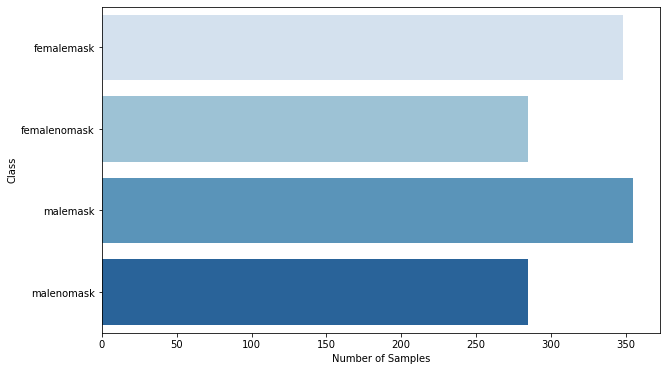

Size of target:  1273
Size of original repository:  (1273, 10000)
Example of original repository: 
[[222 221 221 ... 242 246 250]
 [ 40  34  34 ...   0   0   0]
 [230 228 228 ...  91 111 114]
 ...
 [124 124 123 ...  88  95 102]
 [117 117 118 ... 255 255 255]
 [145 133 127 ...  66  64  63]]


In [4]:

# Create a histogram using seaborn
sns_plot = sns.barplot(y="Class", x="Number of Samples", data=histo_panda, palette="Blues")
sns_plot.figure.set_size_inches(10,6)
plt.show()


print('Size of target: ', len(target))
print('Size of original repository: ', originalrepo.shape)
print('Example of original repository: ')
print(originalrepo)

This plot visualises how male mask has the most number of samples within the data frame with female masks being the second highest number of instances. With females without masks and males without masks with the next highest count repectively. This shows a class imbalance as there is more counts of images with masks than without mask and there is over double the number of males with masks than without.  

##### Saved Plots as JPG Files

In [5]:
# Save the image
sns_plot.figure.savefig('barchart.jpg', orientation = 'landscape', dpi = 600, transparent=True)
print('Saved Class Distribution Bar Chart')

Saved Class Distribution Bar Chart


#### Random OverSampling Repository 

Random OverSampling (ROS) is a data based imbalance handling techniques that is applied to the HOG repository. This aims to increase the minority class to provide a balanced dataset. There can be issues when using a non-binary datasets because it is more difficult to establish the minority class however the process is applied below and this augmentation is visualised in the following barplot.



In [6]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
hogrepo_ros, target_ros = ros.fit_resample(hogrepo,target)


#### Calculate the Distribution

In [7]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
hogrepo_ros, target_ros = ros.fit_resample(hogrepo,target)

print('\nCalculating class distribution (after ROS)')
histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(target_ros)))):
    cont = 0
    for j, label2 in enumerate(target_ros):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(target_ros)])
## Save the histogram as a .csv file   
with open('classdistribution_ros.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, hist in enumerate(histo):
        filewriter.writerow(hist)
## Convert histo into a panda dataframe
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(target_ros)))



Calculating class distribution (after ROS)
          Class  Number of Samples
0    femalemask                355
1  femalenomask                355
2      malemask                355
3    malenomask                355
Total images: 1420


#### Visualise Class Distribution After ROS


Showing class distribution bar chart (after ros)


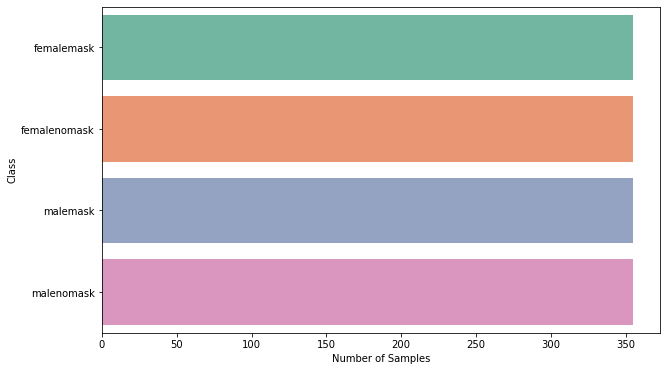

Size of ROS augmented target:  1420
Size of ROS augmented repository:  (1420, 1800)
Example of the ROS augmented repository: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
## Create a histogram using seaborn
sns_plot = sns.barplot(y="Class", x="Number of Samples", data=histo_panda, palette="Set2")
sns_plot.figure.set_size_inches(10,6)
print('\nShowing class distribution bar chart (after ros)')
plt.show()

print('Size of ROS augmented target: ', len(target_ros))
print('Size of ROS augmented repository: ', hogrepo_ros.shape)
print('Example of the ROS augmented repository: ')
print(hogrepo_ros)

Clearly the repository has been augmented from 1273 images with 10000, to 1420 images with 1800. Resulting in each class containing 350 instances each and more balanced. However as this is not a binary classification in which random oversampling is most effective on it will be further improved with the application of 

#### Save the image

In [9]:
sns_plot.figure.savefig('barchart_ros.jpg', orientation = 'landscape', dpi = 600, transparent=True)


### Class Imbalance

To combat this class inbalance the following code will be introduced to create a function that will follow the standard balancing equation to calculate the k values for ech class. This will obtain the number of classes in label list and sort

As this is a  non-Binary datasets they have different class sizes  a special category of balancing methods can be applied to the datasets, which also mitigate the disadvantages of both oversampling and undersampling

The Standard Balancing Equation can help calculate the imbalances with the number of clusters representing the total number of instances of a specific class divided by the mean class distribution. A function below is created to follows the standard balancing equation to calculate k for each class.


#### K Using Standard Balancing Equation

In [10]:
def standardbalancingequation(target):
    import math
    
    ## Obtain the number of classes in label list and sort
    labelsIndexesUnique = list(set(target))
    labelsIndexesUnique.sort()
    
    ## For each class, count the number of instances and calculate ki
    k = []
    for label in labelsIndexesUnique:
        k.append(target.count(label))
    avgInst = sum(k)/len(k)
    k = [math.floor((ki/avgInst)+1) for ki in k]
    print('Values of k for each class: ', k)
    return k

k_kmeans = standardbalancingequation(target)
print('Number of classes after class decomposition: ', sum(k_kmeans))


Values of k for each class:  [2, 1, 2, 1]
Number of classes after class decomposition:  6


#### Class Decomposition(CD) Using KMeans

In [11]:
def CDKmeans(data, target, k): 
    from sklearn.cluster import KMeans
    target_cd = ['']*len(target)
    IndexesUnique = list(set(target))
    IndexesUnique.sort()
    for i, label in enumerate(IndexesUnique):
        print('Number of clusters for class '+str(label)+': '+str(k[i]))
        
        ## Split the dataset
        data_tocluster = []
        data_tocluster_index = []
        for j, dat in enumerate(data):
            if target[j]==label:
                data_tocluster.append(dat)
                data_tocluster_index.append(j)
        if 1<k[i]<=len(data_tocluster):
            
                ## Apply k-means to the list    
                kmeans = KMeans(n_clusters=k[i], random_state=0).fit(data_tocluster)
                for n, m in enumerate(kmeans.labels_):
                    target_cd[data_tocluster_index[n]]=str(label)+'_c'+str(m)
        else:
            for m in data_tocluster_index:
                target_cd[m]=str(label)+'_c0'
    return target_cd

target_cd = CDKmeans(binarisedrepo, target, k_kmeans)


Number of clusters for class femalemask: 2
Number of clusters for class femalenomask: 1
Number of clusters for class malemask: 2
Number of clusters for class malenomask: 1


As femalenomask and malenomask is smaller than 2 no clustering is needed. However, femalemask and malemask all have values over 2 therefore floor is applied to give the correct clusters.

#### Calculating Class Distribution After Class Decomposition

In [12]:

histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(target_cd)))):
    cont = 0
    for j, label2 in enumerate(target_cd):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(target_cd)])

        
## Convert histo into a panda dataframe
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(target_cd)))


             Class  Number of Samples
0    femalemask_c0                348
1  femalenomask_c0                285
2      malemask_c0                355
3    malenomask_c0                285
Total images: 1273


As a result of the class decomposition method, the size of the augmented pixel repository has remained 1236 rows with 1800 columns. Creating two more classes for the "original" repository and placed within target_cd. The repository consists of the 2 female mask classifiers, femalemask_c0 with 64 and femalemask_c1 with 279. A classifier for females without masks (femalenomask_c0) with 277, a classifier for males without masks (malenomask_c0) with 197. With finally 2 male mask classifiers, malemask_c0 with 274 and malemask_c1 with 145. Overall creating six classes in this class decomposition repository.

This repository will be converted into a pandas dataframe named original_cd and its class distribution can be visualised below with a barplot. 

###### Visualise Class Distribution After Class Decomposition

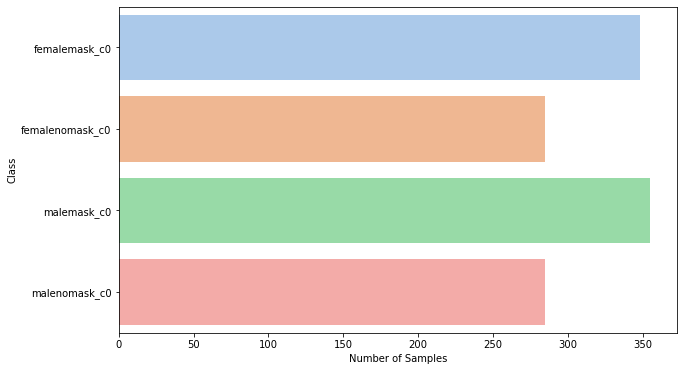

In [13]:
## Create a histogram using seaborn
sns_plot = sns.barplot(y="Class", x="Number of Samples", data=histo_panda, palette = 'pastel')
sns_plot.figure.set_size_inches(10,6)
plt.show()

##### Saved Plots as JPG Files

In [14]:
## Save the image
sns_plot.figure.savefig('barchart_cd.jpg', orientation = 'landscape', dpi = 600, transparent=True)


### Repositories as CSV Files 

Each Numpy data frame is converted to a csv file.

 - Original repository of images resized and flattened saved as 'originalrepo.csv'
 - Binarised repository of images resized, binarised and flattened  saved as 'binarisedrepo.csv'
 - Hog feature extraction repository of images resized, binarised, hog features extracted and flattened saved as 'hogrepo.csv'
 - Class Decomposition repository of images resized, binarised, hog features extracted and flattened with class decomposition applied and flattened. Then saved as 'original_cd.csv'. 

#### Original Repository


In [15]:
with open('originalrepo.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, h in enumerate(originalrepo):
        row = np.concatenate((h,[target[i]]))
        filewriter.writerow(row)

print('\n originalrepo saved as originalrepo.csv') 


 originalrepo saved as originalrepo.csv


#### Denoised Repository

In [16]:
with open('denoiserepo.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, l in enumerate(denoiserepo):
        row = np.concatenate((l,[target[i]]))
        filewriter.writerow(row)
print('\n denoiserepo saved as denoiserepo.csv') 


 denoiserepo saved as denoiserepo.csv


#### Hog Features Repository

In [17]:
with open('hogrepo.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, h in enumerate(hogrepo):
        row = np.concatenate((h,[target[i]]))
        filewriter.writerow(row)

print('\n hogrepo saved as hogrepo.csv')  



 hogrepo saved as hogrepo.csv


#### Binarised Repository

In [18]:
with open('binarisedrepo.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, l in enumerate(binarisedrepo):
        row = np.concatenate((l,[target[i]]))
        filewriter.writerow(row)
print('\n binarisedrepo saved as binarisedrepo.csv')  


 binarisedrepo saved as binarisedrepo.csv


#### ROS Repository

In [19]:

with open('hog_ros.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, h in enumerate(hogrepo_ros):
        row = np.concatenate((h,[target_ros[i]]))
        filewriter.writerow(row)
        
print('\nhog_ros saved as hog_ros.csv') 


hog_ros saved as hog_ros.csv


#### Class Decomposition Repository

In [20]:
   with open('original_cd.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, pix in enumerate(originalrepo):
        row = np.concatenate((pix,[target_cd[i]]))
        filewriter.writerow(row)
        
print('\n original_cd saved as original_cd.csv')


 original_cd saved as original_cd.csv


3. Implementation of a validation framework where the student compares the performance between the
generated data sets and different classification algorithms (e.g. Support Vector Machine, Random Forests,
Neural Networks, Convolutional Neural Networks, etc.). The student must discuss the metrics to be used (e.g.
accuracy, precision, recall, etc.) and the experimental setting (simple split, cross-validation, leave-one-out,
etc.).

The student explained
and justified the
experimental setting in
quality close to a
scientific paper.
A wide variety of
classification algorithms
and parameter settings
are implemented with
optimal code, showing a
deep understanding of
machine learning by
explaining and justifying
the methods and
parameters.
Results are presented in
quality close to a
scientific paper, using
the most proper metrics
and visualisation
resources for the given
scenario.



## 3. Comparing Classification Algorithms

In total, there has been 5 datasets created. To evaluate datasets on their accuracy to classify female and males with masks and no mask. Each dataset will be split into a train and test set.The data will be split with 80% of the data kept for training the model and 20% used to test the model. Where then 3 algorithms such as Support Vectore Machine Classifier, Random Forest Classifier, Neural Network and Convolutional Neural Networks will be applied to all five repositories and stuctured such as:

3.1 Original Repository 
 - 3.1.1 Support Vectore Machine
 - 3.1.2 Random Forest Classifier
 - 3.1.3 Neural Network
 - 3.1.4 Convolutional Neural Networks
  
3.2 Binarised Repository 
 - 3.2.1 Support Vectore Machine
 - 3.2.2 Random Forest Classifier
 - 3.2.3 Neural Network
 - 3.2.4 Convolutional Neural Networks

3.3 Hog Repository 
 - 3.3.1 Support Vectore Machine
 - 3.3.2 Random Forest Classifier
 - 3.3.3 Neural Network
 - 3.3.4 Convolutional Neural Networks

3.4 ROS Repository
 - 3.4.1 Support Vectore Machine
 - 3.4.2 Random Forest Classifier
 - 3.4.3 Neural Network
 - 3.4.4 Convolutional Neural Networks

3.5 Class Decomposition Repository 
 - 3.5.1 Support Vectore Machine
 - 3.5.2 Random Forest Classifier
 - 3.5.3 Neural Network
 - 3.5.4 Convolutional Neural Networks

### Original Repository

For each repository, Support Vector Machine and Random Forest will be applied to the dataset before a cross validation function measures the accuracy of each classifier. 

##### Split the Data Set

Using scitkitlearns train_test_split function will allow the data to be split 80% of data into the training set and 20% split into a testing set. This will be stratified to provide an optimum split. Both classifiers are fit to their model with the training dataset before making the prediction model using the test set in each case respectively. This is shown below in section 1.1 and 1.1. 

In [37]:
# Set random seed for reproducibility
np.random.seed(123)

In [21]:
# import the relevant packages
from sklearn.model_selection import train_test_split
target = np.array(target)
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(originalrepo, target, stratify=target, test_size=0.2)


#### Support Vector Machine(SVM) 

In [37]:
# Set random seed for reproducibility
np.random.seed(123)

In [22]:
#import Support Vector Classifier
from sklearn.svm import SVC

# initiatiate the SVC
svc_model = SVC()

# fit theclassifier to the training data
svc_fit = svc_model.fit(X_train, y_train)

# predict the model with the test data
svc_pred = svc_model.predict(X_test)

##### Random Forest 

In [37]:
# Set random seed for reproducibility
np.random.seed(123)

In [23]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# initiatiate the RandomForestClassifier
rf_model = RandomForestClassifier()

# fit the classifier to the training data
rf_fit = rf_model.fit(X_train, y_train)

# predict the model with the test data
rf_pred = rf_model.predict(X_test)


####  Accuracy of the Model

In [24]:
# Evaluating Mean Accuracy for all folds
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
print('Mean Accuracy for SVM: ',np.mean(cross_val_score(svc_model, originalrepo, target, cv=5, scoring = 'accuracy')))
print('Mean Accuracy for RF: ',np.mean(cross_val_score(rf_model, originalrepo, target, cv=5, scoring = 'accuracy')))

Mean Accuracy for SVM:  0.5592465647676393
Mean Accuracy for RF:  0.5317153002933457


The accuracy of the Support Vector Machine is 56%. This is an improvement on the the 25% chance without a classifier. The number of true positives in the 101 which is higher than 83 number of true negatives. However there is more false positive than false negatives. This suggest the classifier is 53% more likely to identify the correct class than not. 

When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

In [25]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

#scoring = {'accuracy' : make_scorer(accuracy_score), 
#           'precision' : make_scorer(precision_score)}

#precision_score(y_test, rf_pred, average='micro', zero_division=1)


#### NN 

In order to run a neural network on the dataset these five steps are applied:
    
 1. Flatten the input image dimensions to 1D (width pixels x height pixels)
 2. One-Hot Encode the categorical column
 3. Build a model architecture (Sequential) with Dense layers
 4. Train the model and make predictions

In order to implement one hot encoding the number of classes and the label of the classes to set each convert them to numerical values to be apply to train input into the neural network. The shape of the dataset and the target set can be checked to ensure it has the correct shape.

In [37]:
# Set random seed for reproducibility
np.random.seed(123)

In [38]:
# Create Keras backend environment for CNN
os.environ['KERAS_BACKEND']='tensorflow'


In [26]:

#convert target dataset to a numpy array for the NN
target = np.array(target)

# The number of image categories
n_categories = 4

# The unique values of categories in the data
categories = np.array(["femalemask", "femalenomask", "malemask", "malenomask"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(target), n_categories))

# Loop over the labels
for ii in range(len(target)):
    # Find the location of this label in the categories variable
    jj = np.where(categories== target[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

In [27]:
print(originalrepo.shape, ohe_labels.shape, originalrepo.shape, ohe_labels.shape)

(1273, 10000) (1273, 4) (1273, 10000) (1273, 4)


In [29]:
# Import relevant packages
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold

fold_no = 1
# Define per-fold score containers <-- these are new
acc_per_fold_nn = []
loss_per_fold_nn = []
# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)
data = originalrepo

for i, (train_index, val_index) in enumerate(kfold.split(data, ohe_labels.argmax(1))):
    x_train_kf, x_val_kf = data[train_index], data[val_index]
    y_train_kf, y_val_kf = ohe_labels[train_index], ohe_labels[val_index]
    
    nn_model = Sequential()
    nn_model.add(Dense(10, input_shape=(10000,), activation='relu'))
    nn_model.add(Dense(10, activation='relu'))
    nn_model.add(Dense(4, activation='sigmoid'))

    # Compile the model
    nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print(f'Training for fold {i}')

    # Fit data to model
    history = nn_model.fit(x_train_kf, y_train_kf,
    batch_size=5,
    epochs=5)

    # Generate generalization metrics
    scores = nn_model.evaluate(x_val_kf, y_val_kf)
    print(f'Score for fold {fold_no}: {nn_model.metrics_names[0]} of {scores[0]}; {nn_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold_nn.append(scores[1] * 100)
    loss_per_fold_nn.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

Training for fold 0
Epoch 1/5
204/204 [==============================] - 2s 4ms/step - loss: 16.6716 - accuracy: 0.2307
Epoch 2/5
204/204 [==============================] - 1s 4ms/step - loss: 1.3854 - accuracy: 0.2689
Epoch 3/5
204/204 [==============================] - 1s 4ms/step - loss: 1.3856 - accuracy: 0.2658
Epoch 4/5
204/204 [==============================] - 1s 3ms/step - loss: 1.3822 - accuracy: 0.2815
Epoch 5/5
8/8 [==============================] - 0s 3ms/step - loss: 1.3810 - accuracy: 0.2784
Score for fold 1: loss of 1.3810449838638306; accuracy of 27.843138575553894%
Training for fold 1
Epoch 1/5
204/204 [==============================] - 2s 4ms/step - loss: 26.5383 - accuracy: 0.2756
Epoch 2/5
204/204 [==============================] - 1s 4ms/step - loss: 1.3847 - accuracy: 0.2761
Epoch 3/5
204/204 [==============================] - 1s 4ms/step - loss: 1.3841 - accuracy: 0.2740
Epoch 4/5
204/204 [==============================] - 1s 4ms/step - loss: 1.3801 - accuracy: 

To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

The accuracy of this neural network only has a 33% accuracy of predicting the correct classifier. This is very low accuracy however it is still an improvement compared to the 25% chance without using any classify. 

### CNN

CNN can classify and extract their own features therefore there is no need to use the hog dataset. This is why CNN will be used on the image repository. Thesefore the data will be split again using the datarepo and the target_cd.
The images are all 100 by 100 images coloured imaged. The CNN will compute 32 filters over the input with a response map that is 26 x 26 in size. The siz of the patches is 3 x 3 and the depth of the output feature map is 32. Max pooling extracts windows from the input much like a convolution and halves the feature map.

relu function is a linear function but before the activation point gives you zero.  

fully connected NN is when all inputs are connected to  all neurons in the first hidden layer. 
Then all neurons connect to a single neuron(second hidden layer) which produces the output.
 
A logistic regression calculates the probability of an input to be 0 or 1 

since we need to predict the probabiliry of a sample being 0 or 1 we need to set the activation function for th epredicted output to something more suitable
relu can give 0 or 1 
sigmoid function is most popular 

loss function
you want to produce an expected output relevant output
the initial hyptheses 
helps you find how far you are from the actual values

the mathematical functio nhehind loss function wants the smallests value possible.

cost function helps calculates the weights and the bias. the more training data you have you can average more when you calculate your loss
the cost function depends on the training function

gradient descent 
you want to find wight and ias that minisiase the cost
you get a 3d function valuing your cost

alpha is the learning rate gives a difference neature when you train the neural network


when you calculate and you update the weight bias it is referred to as back propagation 
you need to pass the image through the network and pass it back 
you pass a batch of data 


Now it's time to train the model. We will define a sequential CNN with two convolutional layers, a max pooling of size 2×2 and a dropout of 0.25. Then, we will add a flatten layer, add a densely connected layer with a ReLu activation, afterwards add another dropout of 0.5, and finally add a densely connected layer to the output with a softmax activation function. This configuration is not strict and you can find many different examples, such as this other one. NOTE: If you get an error, you may need to change the input_shape to (1,28,28), which means that you also need to change the shape of X_train_reshape and X_test_reshape to (X.shape[0],1,28,28).


Reshape the data into four dimensions i.e. the training set will be of shape (60000,28,28,1) and the test set of (10000,28,28). This is useful since the network needs an input shape of (1,28,28) for each of the samples.

Convert the format of the input into float32 (apparently the CNN works better with it).

Normalise i.e. divide all values by 255.

It will be transformed from standard to normalised grayscale by dividing the numpyarray by 255 before reducing noise to help improve the image for feature extraction.

CNNs also like their target to be categorical, i.e. instead of the target being values from 0 to 9, each target value will be a vector indicating which is the class according to the position. Run the following cell to see what I mean.

X_train shape (988, 100, 100, 1)
y_train shape (988, 4)
X_test shape (248, 100, 100, 1)
y_test shape (248, 4)

After creating the model architecture, we will compile it. We will use the adam optimiser to improve the loss obtained by the cross_entropy method, and then we will request the model to obtain the accuracy

Once compiled, we will fit this model using our training data. If your computer is slow, I recommend you NOT to use the entire training dataset. This can be done by reducing the number n to something smaller than 60'000. Also, you can reduce the number of epochs.

In [39]:
# Set random seed for reproducibility
np.random.seed(123)

In [30]:

# Define per-fold score containers <-- these are new
acc_per_fold_cnn = []
loss_per_fold_cnn = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)
data = originalrepo
fold_no = 1

for i, (train_index, val_index) in enumerate(kfold.split(data, ohe_labels.argmax(1))):
    x_train_kf, x_val_kf = data[train_index], data[val_index]
    y_train_kf, y_val_kf = ohe_labels[train_index], ohe_labels[val_index]
    
    # Reshape the dataset into 4D array
    x_train_kf = x_train_kf.reshape(x_train_kf.shape[0], 100, 100, 1)
    x_val_kf = x_val_kf.reshape(x_val_kf.shape[0], 100, 100, 1)

    # Convert dataset into a float32
    x_train_kf = x_train_kf.astype('float32')
    x_val_kf = x_val_kf.astype('float32')

    # Normalise the dataset
    x_train_kf /= 255
    x_val_kf /= 255

    
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
    cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2,2)))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(4, activation='softmax'))

    # Compile the model
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print(f'Training for fold {i}')

    # Fit data to model
    history = cnn_model.fit(x_train_kf, y_train_kf,
    batch_size=5,
    epochs=5)

    # Generate generalization metrics
    scores = cnn_model.evaluate(x_val_kf, y_val_kf)
    print(f'Score for fold {fold_no}: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold_cnn.append(scores[1] * 100)
    loss_per_fold_cnn.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

Training for fold 0
Epoch 1/5
204/204 [==============================] - 28s 132ms/step - loss: 1.6091 - accuracy: 0.3198
Epoch 2/5
204/204 [==============================] - 28s 135ms/step - loss: 1.0665 - accuracy: 0.5628
Epoch 3/5
204/204 [==============================] - 28s 136ms/step - loss: 0.8715 - accuracy: 0.6629
Epoch 4/5
204/204 [==============================] - 28s 138ms/step - loss: 0.5216 - accuracy: 0.8166
Epoch 5/5
8/8 [==============================] - 1s 104ms/step - loss: 1.3663 - accuracy: 0.5490
Score for fold 1: loss of 1.3663049936294556; accuracy of 54.90196347236633%
Training for fold 1
Epoch 1/5
204/204 [==============================] - 28s 135ms/step - loss: 1.5409 - accuracy: 0.3528
Epoch 2/5
204/204 [==============================] - 27s 133ms/step - loss: 1.1989 - accuracy: 0.4771
Epoch 3/5
204/204 [==============================] - 27s 132ms/step - loss: 0.8831 - accuracy: 0.6592
Epoch 4/5
204/204 [==============================] - 27s 133ms/step - lo

##### Cross Validation

In order to evaluate the models objectively cross validation will be implemented. By importing the cross_validate function from sklearn.model_selection the accuracy scores of support vector machine and random forest will be compared. 

Evaluating Precision, Recall and F1-score both by fold and average.

### Denoised Repository

In [31]:
# import the relevant packages
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(denoiserepo, target, test_size=0.2)


##### Support Vector Machine(SVM) 

The data will be applied to Support Vector Machine algorithm below with the Support Vector Classifier(SVC).

In [32]:
#import Support Vector Classifier
from sklearn.svm import SVC

# initiatiate the SVC
svc_model = SVC()

# fit theclassifier to the training data
svc_fit = svc_model.fit(X_train, y_train)

# predict the model with the test data
svc_pred = svc_model.predict(X_test)

##### Random Forest 

In [33]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# initiatiate the RandomForestClassifier
rf_model = RandomForestClassifier()

# fit the classifier to the training data
rf_fit = rf_model.fit(X_train, y_train)

# predict the model with the test data
rf_pred = rf_model.predict(X_test)


#### Accuracy of the Model

In [34]:
# Evaluating Mean Accuracy for all folds
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
print('Mean Accuracy for SVM: ',np.mean(cross_val_score(svc_model, denoiserepo, target, cv=5, scoring = 'accuracy')))
print('Mean Accuracy for RF: ',np.mean(cross_val_score(rf_model, denoiserepo, target, cv=5, scoring = 'accuracy')))
#precision_score(y_test, rf_pred, average='micro', zero_division=1)


Mean Accuracy for SVM:  0.5529689671144048
Mean Accuracy for RF:  0.5348926972363749


The accuracy of the Support Vector Machine is 64%. This is an improvement on the the 25% chance without a classifier. The number of true positives in the 101 which is higher than 83 number of true negatives. However there is more false positive than false negatives. This suggest the classifier is 64% more likely to identify the correct class than not. 

### NN 

A neural network will be implemented following the 4 steps previously found in section 1.1. 

In [37]:
# Set random seed for reproducibility
np.random.seed(123)

In [35]:
data = denoiserepo
fold_no = 1
# Define per-fold score containers <-- these are new
acc_per_fold_de_nn = []
loss_per_fold_de_nn = []
# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)


for i, (train_index, val_index) in enumerate(kfold.split(data, ohe_labels.argmax(1))):
    x_train_kf, x_val_kf = data[train_index], data[val_index]
    y_train_kf, y_val_kf = ohe_labels[train_index], ohe_labels[val_index]
    
    nn_model = Sequential()
    nn_model.add(Dense(10, input_shape=(10000,), activation='relu'))
    nn_model.add(Dense(10, activation='relu'))
    nn_model.add(Dense(4, activation='sigmoid'))

    # Compile the model
    nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print(f'Training for fold {i}')

    # Fit data to model
    history = nn_model.fit(x_train_kf, y_train_kf,
    batch_size=5,
    epochs=5)

    # Generate generalization metrics
    scores = nn_model.evaluate(x_val_kf, y_val_kf)
    print(f'Score for fold {fold_no}: {nn_model.metrics_names[0]} of {scores[0]}; {nn_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold_de_nn.append(scores[1] * 100)
    loss_per_fold_de_nn.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

Training for fold 0
Epoch 1/5
204/204 [==============================] - 1s 2ms/step - loss: 1.4502 - accuracy: 0.2734
Epoch 2/5
204/204 [==============================] - 0s 2ms/step - loss: 1.3808 - accuracy: 0.3429
Epoch 3/5
204/204 [==============================] - 0s 2ms/step - loss: 1.3682 - accuracy: 0.3077
Epoch 4/5
204/204 [==============================] - 0s 2ms/step - loss: 1.3630 - accuracy: 0.3008
Epoch 5/5
8/8 [==============================] - 0s 2ms/step - loss: 1.3035 - accuracy: 0.3647
Score for fold 1: loss of 1.3035420179367065; accuracy of 36.4705890417099%
Training for fold 1
Epoch 1/5
204/204 [==============================] - 1s 2ms/step - loss: 1.4102 - accuracy: 0.2354
Epoch 2/5
204/204 [==============================] - 0s 2ms/step - loss: 1.3841 - accuracy: 0.2700
Epoch 3/5
204/204 [==============================] - 0s 2ms/step - loss: 1.3835 - accuracy: 0.2817
Epoch 4/5
204/204 [==============================] - 0s 2ms/step - loss: 1.3852 - accuracy: 0.26

To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

### CNN

CNN can classify and extract their own features therefore there is no need to use the hog dataset. This is why CNN will be used on the image repository. Thesefore the data will be split again using the datarepo and the target_cd.
The images are all 100 by 100 images coloured imaged. The CNN will compute 32 filters over the input with a response map that is 26 x 26 in size. The siz of the patches is 3 x 3 and the depth of the output feature map is 32. Max pooling extracts windows from the input much like a convolution and halves the feature map.



In [ ]:
# Set random seed for reproducibility
np.random.seed(123)

In [36]:
# Import relevant packages
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

data = denoiserepo
fold_no = 1
# Define per-fold score containers <-- these are new
acc_per_fold_de_cnn = []
loss_per_fold_de_cnn = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)


for i, (train_index, val_index) in enumerate(kfold.split(data, ohe_labels.argmax(1))):
    x_train_kf, x_val_kf = data[train_index], data[val_index]
    y_train_kf, y_val_kf = ohe_labels[train_index], ohe_labels[val_index]
    
    
    # Reshape the dataset into 4D array
    x_train_kf = x_train_kf.reshape(x_train_kf.shape[0], 100, 100, 1)
    x_val_kf = x_val_kf.reshape(x_val_kf.shape[0], 100, 100, 1)

    # Convert dataset into a float32
    x_train_kf = x_train_kf.astype('float32')
    x_val_kf = x_val_kf.astype('float32')

    # Normalise the dataset
    x_train_kf /= 255
    x_val_kf /= 255
    
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
    cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2,2)))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(4, activation='softmax'))

    # Compile the model
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print(f'Training for fold {i}')

    # Fit data to model
    history = cnn_model.fit(x_train_kf, y_train_kf,
    batch_size=5,
    epochs=5)

    # Generate generalization metrics
    scores = cnn_model.evaluate(x_val_kf, y_val_kf)
    print(f'Score for fold {fold_no}: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold_de_cnn.append(scores[1] * 100)
    loss_per_fold_de_cnn.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

Training for fold 0
Epoch 1/5
204/204 [==============================] - 29s 138ms/step - loss: 1.3897 - accuracy: 0.2338
Epoch 2/5
204/204 [==============================] - 29s 141ms/step - loss: 1.3837 - accuracy: 0.2390
Epoch 3/5
204/204 [==============================] - 29s 144ms/step - loss: 1.3802 - accuracy: 0.2836
Epoch 4/5
204/204 [==============================] - 30s 148ms/step - loss: 1.3794 - accuracy: 0.2734
Epoch 5/5
8/8 [==============================] - 1s 118ms/step - loss: 1.3807 - accuracy: 0.2784
Score for fold 1: loss of 1.3807481527328491; accuracy of 27.843138575553894%
Training for fold 1
Epoch 1/5
204/204 [==============================] - 29s 141ms/step - loss: 1.3877 - accuracy: 0.2793
Epoch 2/5
204/204 [==============================] - 29s 141ms/step - loss: 1.3830 - accuracy: 0.2854
Epoch 3/5
204/204 [==============================] - 29s 143ms/step - loss: 1.3829 - accuracy: 0.2884
Epoch 4/5
204/204 [==============================] - 29s 144ms/step - l

X_train shape (988, 100, 100, 1)
y_train shape (988, 4)
X_test shape (248, 100, 100, 1)
y_test shape (248, 4)

##### Cross Validation

In order to evaluate the models objectively cross validation will be implemented. By importing the cross_validate function from sklearn.model_selection the accuracy scores of support vector machine and random forest will be compared. 

Evaluating Precision, Recall and F1-score both by fold and average.

### Binarised Repository

##### Split the Data

In [37]:
# Set random seed for reproducibility
np.random.seed(123)

In [38]:
# import the relevant packages
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(binarisedrepo, target, test_size=0.2)


##### Support Vector Machine(SVM) 

In [39]:
# Set random seed for reproducibility
np.random.seed(123)

In [40]:
# Import Support Vector Classifier
from sklearn.svm import SVC

# Initiatiate the SVC
svc_model = SVC()

# Fit theclassifier to the training data
svc_fit = svc_model.fit(X_train, y_train)

# Predict the model with the test data
svc_pred = svc_model.predict(X_test)

##### Random Forest 

In [41]:
# Set random seed for reproducibility
np.random.seed(123)

In [42]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initiatiate the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the classifier to the training data
rf_fit = rf_model.fit(X_train, y_train)

# Predict the model with the test data
rf_pred = rf_model.predict(X_test)


#### Accuracy of the Model

In [ ]:
# Evaluating Mean Accuracy for all folds
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
print('Mean Accuracy for SVM: ',np.mean(cross_val_score(svc_model, originalrepo, target, cv=5, scoring = 'accuracy')))
print('Mean Accuracy for RF: ',np.mean(cross_val_score(rf_model, originalrepo, target, cv=5, scoring = 'accuracy')))
precision_score(y_test, rf_pred, average='micro', zero_division=1)


#### NN 

In [43]:
# Set random seed for reproducibility
np.random.seed(123)

In [45]:
data = binarisedrepo
fold_no = 1
# Define per-fold score containers <-- these are new
acc_per_fold_bin_nn = []
loss_per_fold_bin_nn = []
# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)


for i, (train_index, val_index) in enumerate(kfold.split(data, ohe_labels.argmax(1))):
    x_train_kf, x_val_kf = data[train_index], data[val_index]
    y_train_kf, y_val_kf = ohe_labels[train_index], ohe_labels[val_index]
    
    nn_model = Sequential()
    nn_model.add(Dense(10, input_shape=(10000,), activation='relu'))
    nn_model.add(Dense(10, activation='relu'))
    nn_model.add(Dense(4, activation='sigmoid'))

    # Compile the model
    nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print(f'Training for fold {i}')

    # Fit data to model
    history = nn_model.fit(x_train_kf, y_train_kf,
    batch_size=5,
    epochs=5)

    # Generate generalization metrics
    scores = nn_model.evaluate(x_val_kf, y_val_kf)
    print(f'Score for fold {fold_no}: {nn_model.metrics_names[0]} of {scores[0]}; {nn_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold_bin_nn.append(scores[1] * 100)
    loss_per_fold_bin_nn.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

Training for fold 0
Epoch 1/5
204/204 [==============================] - 1s 2ms/step - loss: 1.3859 - accuracy: 0.2455
Epoch 2/5
204/204 [==============================] - 0s 2ms/step - loss: 1.3835 - accuracy: 0.2294
Epoch 3/5
204/204 [==============================] - 0s 2ms/step - loss: 1.3812 - accuracy: 0.2794
Epoch 4/5
204/204 [==============================] - 0s 2ms/step - loss: 1.3827 - accuracy: 0.2806
Epoch 5/5
8/8 [==============================] - 0s 2ms/step - loss: 1.3811 - accuracy: 0.2784
Score for fold 1: loss of 1.3811358213424683; accuracy of 27.843138575553894%
Training for fold 1
Epoch 1/5
204/204 [==============================] - 1s 2ms/step - loss: 1.3862 - accuracy: 0.2487
Epoch 2/5
204/204 [==============================] - 0s 2ms/step - loss: 1.3856 - accuracy: 0.2588
Epoch 3/5
204/204 [==============================] - 0s 2ms/step - loss: 1.3820 - accuracy: 0.2747
Epoch 4/5
204/204 [==============================] - 0s 2ms/step - loss: 1.3814 - accuracy: 0.

To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

#### CNN

CNN can classify and extract their own features therefore there is no need to use the hog dataset. This is why CNN will be used on the image repository. Thesefore the data will be split again using the datarepo and the target_cd.
The images are all 100 by 100 images coloured imaged. The CNN will compute 32 filters over the input with a response map that is 26 x 26 in size. The siz of the patches is 3 x 3 and the depth of the output feature map is 32. Max pooling extracts windows from the input much like a convolution and halves the feature map.

In [46]:
# Set random seed for reproducibility
np.random.seed(123)

In [47]:
# Import relevant packages
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

data = binarisedrepo
fold_no = 1
# Define per-fold score containers <-- these are new
acc_per_fold_bin_cnn = []
loss_per_fold_bin_cnn = []
# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)


for i, (train_index, val_index) in enumerate(kfold.split(data, ohe_labels.argmax(1))):
    x_train_kf, x_val_kf = data[train_index], data[val_index]
    y_train_kf, y_val_kf = ohe_labels[train_index], ohe_labels[val_index]
    
    
    # Reshape the dataset into 4D array
    x_train_kf = x_train_kf.reshape(x_train_kf.shape[0], 100, 100, 1)
    x_val_kf = x_val_kf.reshape(x_val_kf.shape[0], 100, 100, 1)

    # Convert dataset into a float32
    x_train_kf = x_train_kf.astype('float32')
    x_val_kf = x_val_kf.astype('float32')

    # Normalise the dataset
    x_train_kf /= 255
    x_val_kf /= 255
    
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
    cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2,2)))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(4, activation='softmax'))

    # Compile the model
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print(f'Training for fold {i}')

    # Fit data to model
    history = cnn_model.fit(x_train_kf, y_train_kf,
    batch_size=5,
    epochs=5)

    # Generate generalization metrics
    scores = cnn_model.evaluate(x_val_kf, y_val_kf)
    print(f'Score for fold {fold_no}: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold_bin_cnn.append(scores[1] * 100)
    loss_per_fold_bin_cnn.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

Training for fold 0
Epoch 1/5
204/204 [==============================] - 28s 133ms/step - loss: 1.3860 - accuracy: 0.2480
Epoch 2/5
204/204 [==============================] - 28s 139ms/step - loss: 1.3845 - accuracy: 0.2809
Epoch 3/5
204/204 [==============================] - 28s 136ms/step - loss: 1.3812 - accuracy: 0.2664
Epoch 4/5
204/204 [==============================] - 28s 137ms/step - loss: 1.3805 - accuracy: 0.2834
Epoch 5/5
8/8 [==============================] - 1s 102ms/step - loss: 1.3812 - accuracy: 0.2784
Score for fold 1: loss of 1.3811935186386108; accuracy of 27.843138575553894%
Training for fold 1
Epoch 1/5
204/204 [==============================] - 29s 138ms/step - loss: 1.3854 - accuracy: 0.2447
Epoch 2/5
204/204 [==============================] - 28s 138ms/step - loss: 1.3852 - accuracy: 0.2294
Epoch 3/5
204/204 [==============================] - 28s 139ms/step - loss: 1.3812 - accuracy: 0.2953
Epoch 4/5
204/204 [==============================] - 30s 147ms/step - l

X_train shape (988, 100, 100, 1)
y_train shape (988, 4)
X_test shape (248, 100, 100, 1)
y_test shape (248, 4)

Cross Validation will be implemented to compare the precision, recall and f1 score of each classifier on the binarised repository.



## Hog Repository

##### Split the Data

The data will be applied to Support Vector Machine algorithm below with the Support Vector Classifier(SVC).

In [ ]:
# Set random seed for reproducibility
np.random.seed(123)

In [ ]:
# import the relevant packages
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hogrepo, target, test_size=0.2)


#### Support Vector Machine(SVM) 

In [ ]:
# Set random seed for reproducibility
np.random.seed(123)

In [ ]:
#import Support Vector Classifier
from sklearn.svm import SVC

# initiatiate the SVC
svc_model = SVC()

# fit theclassifier to the training data
svc_fit = svc_model.fit(X_train, y_train)

# predict the model with the test data
svc_pred = svc_model.predict(X_test)

#### Random Forest 

In [ ]:
# Set random seed for reproducibility
np.random.seed(123)

In [ ]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# initiatiate the RandomForestClassifier
rf_model = RandomForestClassifier()

# fit theclassifier to the training data
rf_fit = rf_model.fit(X_train, y_train)

# predict the model with the test data
rf_pred = rf_model.predict(X_test)


#### Accuracy of the Model

In [ ]:
# Evaluating Mean Accuracy for all folds
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
print('Mean Accuracy for SVM: ',np.mean(cross_val_score(svc_model, originalrepo, target, cv=5, scoring = 'accuracy')))
print('Mean Accuracy for RF: ',np.mean(cross_val_score(rf_model, originalrepo, target, cv=5, scoring = 'accuracy')))
precision_score(y_test, rf_pred, average='micro', zero_division=1)


### NN 

In [ ]:
# Set random seed for reproducibility
np.random.seed(123)

In [ ]:
data = hogrepo
fold_no = 1
# Define per-fold score containers <-- these are new
acc_per_fold_hog_nn = []
loss_per_fold_hog_nn = []
# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)


for i, (train_index, val_index) in enumerate(kfold.split(data, ohe_labels.argmax(1))):
    x_train_kf, x_val_kf = data[train_index], data[val_index]
    y_train_kf, y_val_kf = ohe_labels[train_index], ohe_labels[val_index]
    
    nn_model = Sequential()
    nn_model.add(Dense(10, input_shape=(10000,), activation='relu'))
    nn_model.add(Dense(10, activation='relu'))
    nn_model.add(Dense(4, activation='sigmoid'))

    # Compile the model
    nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print(f'Training for fold {i}')

    # Fit data to model
    history = nn_model.fit(x_train_kf, y_train_kf,
    batch_size=5,
    epochs=5)

    # Generate generalization metrics
    scores = nn_model.evaluate(x_val_kf, y_val_kf)
    print(f'Score for fold {fold_no}: {nn_model.metrics_names[0]} of {scores[0]}; {nn_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold_hog_nn.append(scores[1] * 100)
    loss_per_fold_hog_nn.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

#### CNN

In [ ]:
# Set random seed for reproducibility
np.random.seed(123)

In [ ]:
# Import relevant packages
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

data = hogrepo
fold_no = 1

# Define per-fold score containers <-- these are new
acc_per_fold_hog_cnn = []
loss_per_fold_hog_cnn = []

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)


for i, (train_index, val_index) in enumerate(kfold.split(data, ohe_labels.argmax(1))):
    x_train_kf, x_val_kf = data[train_index], data[val_index]
    y_train_kf, y_val_kf = ohe_labels[train_index], ohe_labels[val_index]
    
    
    # Reshape the dataset into 4D array
    x_train_kf = x_train_kf.reshape(x_train_kf.shape[0], 100, 100, 1)
    x_val_kf = x_val_kf.reshape(x_val_kf.shape[0], 100, 100, 1)

    # Convert dataset into a float32
    x_train_kf = x_train_kf.astype('float32')
    x_val_kf = x_val_kf.astype('float32')

    # Normalise the dataset
    x_train_kf /= 255
    x_val_kf /= 255


    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
    cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2,2)))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(4, activation='softmax'))

    # Compile the model
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print(f'Training for fold {i}')

    # Fit data to model
    history = cnn_model.fit(x_train_kf, y_train_kf,
    batch_size=5,
    epochs=5)

    # Generate generalization metrics
    scores = cnn_model.evaluate(x_val_kf, y_val_kf)
    print(f'Score for fold {fold_no}: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold_hog_cnn.append(scores[1] * 100)
    loss_per_fold_hog_cnn.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

X_train shape (988, 100, 100, 1)
y_train shape (988, 4)
X_test shape (248, 100, 100, 1)
y_test shape (248, 4)

#### ROS Repository

The data will be applied to Support Vector Machine algorithm below with the Support Vector Classifier(SVC).

In [ ]:
# import the relevant packages
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hogrepo_ros, target_ros, test_size=0.2)


##### Support Vector Machine(SVM) 

In [ ]:
#import Support Vector Classifier
from sklearn.svm import SVC

# initiatiate the SVC
svc_model = SVC()

# fit theclassifier to the training data
svc_fit = svc_model.fit(X_train, y_train)

# predict the model with the test data
svc_pred = svc_model.predict(X_test)

##### Random Forest 

In [ ]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# initiatiate the RandomForestClassifier
rf_model = RandomForestClassifier()

# fit the classifier to the training data
rf_fit = rf_model.fit(X_train, y_train)

# predict the model with the test data
rf_pred = rf_model.predict(X_test)


#### Accuracy of the Model

In [ ]:
# Evaluating Mean Accuracy for all folds
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
print('Mean Accuracy for SVM: ',np.mean(cross_val_score(svc_model, originalrepo, target, cv=5, scoring = 'accuracy')))
print('Mean Accuracy for RF: ',np.mean(cross_val_score(rf_model, originalrepo, target, cv=5, scoring = 'accuracy')))
precision_score(y_test, rf_pred, average='micro', zero_division=1)


The accuracy of the Support Vector Machine is 64%. This is an improvement on the the 25% chance without a classifier. The number of true positives in the 101 which is higher than 83 number of true negatives. However there is more false positive than false negatives. This suggest the classifier is 64% more likely to identify the correct class than not. 

#### NN 

In [ ]:
#convert target dataset to a numpy array for the NN
target_ros = np.array(target_ros)

# The number of image categories
n_categories = 4

# The unique values of categories in the data
categories = np.array(["femalemask_c0", "femalemask_c1", "femalenomask_c0", "malemask_c0", "malemask_c1", "malenomask_c0"])

# Initialize ohe_labels as all zeros
ohe_labels_ros = np.zeros((len(target_ros), n_categories))

# Loop over the labels
for ii in range(len(target_ros)):
    # Find the location of this label in the categories variable
    jj = np.where(categories== target_ros[ii])
    # Set the corresponding zero to one
    ohe_labels_ros[ii, jj] = 1

In [ ]:
data = hogrepo_ros
fold_no = 1
# Define per-fold score containers <-- these are new
acc_per_fold_hog_ros_nn = []
loss_per_fold_hog_ros_nn = []
# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)


for i, (train_index, val_index) in enumerate(kfold.split(data, ohe_labels_ros.argmax(1))):
    x_train_kf, x_val_kf = data[train_index], data[val_index]
    y_train_kf, y_val_kf = ohe_labels_ros[train_index], ohe_labels_ros[val_index]
    
    nn_model = Sequential()
    nn_model.add(Dense(10, input_shape=(10000,), activation='relu'))
    nn_model.add(Dense(10, activation='relu'))
    nn_model.add(Dense(4, activation='sigmoid'))

    # Compile the model
    nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print(f'Training for fold {i}')

    # Fit data to model
    history = nn_model.fit(x_train_kf, y_train_kf,
    batch_size=5,
    epochs=5)

    # Generate generalization metrics
    scores = nn_model.evaluate(x_val_kf, y_val_kf)
    print(f'Score for fold {fold_no}: {nn_model.metrics_names[0]} of {scores[0]}; {nn_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold_hog_ros_nn.append(scores[1] * 100)
    loss_per_fold_hog_ros_nn.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

#### CNN

In [ ]:
# Set random seed for reproducibility
np.random.seed(123)

In [ ]:
# Import relevant packages
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

data = hogrepo_ros
fold_no = 1
# Define per-fold score containers <-- these are new
acc_per_fold_hog_ros_cnn = []
loss_per_fold_hog_ros_cnn = []
# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)


for i, (train_index, val_index) in enumerate(kfold.split(data, ohe_labels_ros.argmax(1))):
    x_train_kf, x_val_kf = data[train_index], data[val_index]
    y_train_kf, y_val_kf = ohe_labels_ros[train_index], ohe_labels_ros[val_index]
    
    
    # Reshape the dataset into 4D array
    x_train_kf = x_train_kf.reshape(x_train_kf.shape[0], 100, 100, 1)
    x_val_kf = x_val_kf.reshape(x_val_kf.shape[0], 100, 100, 1)

    # Convert dataset into a float32
    x_train_kf = x_train_kf.astype('float32')
    x_val_kf = x_val_kf.astype('float32')

    # Normalise the dataset
    x_train_kf /= 255
    x_val_kf /= 255
    
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
    cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2,2)))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(4, activation='softmax'))

    # Compile the model
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print(f'Training for fold {i}')

    # Fit data to model
    history = cnn_model.fit(x_train_kf, y_train_kf,
    batch_size=5,
    epochs=5)

    # Generate generalization metrics
    scores = cnn_model.evaluate(x_val_kf, y_val_kf)
    print(f'Score for fold {fold_no}: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold_hog_ros_cnn.append(scores[1] * 100)
    loss_per_fold_hog_ros_cnn.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

X_train shape (988, 100, 100, 1)
y_train shape (988, 4)
X_test shape (248, 100, 100, 1)
y_test shape (248, 4)

## Class Decomposition Repository

The data will be applied to Support Vector Machine algorithm below with the Support Vector Classifier(SVC).

In [ ]:
# import the relevant packages
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(originalrepo, target_cd, test_size=0.2)


#### Support Vector Machine(SVM) 

In [ ]:
#import Support Vector Classifier
from sklearn.svm import SVC

# initiatiate the SVC
svc_model = SVC()

# fit theclassifier to the training data
svc_fit = svc_model.fit(X_train, y_train)

# predict the model with the test data
svc_pred = svc_model.predict(X_test)

#### Random Forest 

In [ ]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# initiatiate the RandomForestClassifier
rf_model = RandomForestClassifier()

# fit theclassifier to the training data
rf_fit = rf_model.fit(X_train, y_train)

# predict the model with the test data
rf_pred = rf_model.predict(X_test)


#### Accuracy of the Model

In [ ]:
# Evaluating Mean Accuracy for all folds
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
print('Mean Accuracy for SVM: ',np.mean(cross_val_score(svc_model, originalrepo, target_cd, cv=5, scoring = 'accuracy')))
print('Mean Accuracy for RF: ',np.mean(cross_val_score(rf_model, originalrepo, target_cd, cv=5, scoring = 'accuracy')))
precision_score(y_test, rf_pred, average='micro', zero_division=1)


#### NN 

In [ ]:
#convert target dataset to a numpy array for the NN
target_cd = np.array(target_cd)

# The number of image categories
n_categories = 6

# The unique values of categories in the data
categories = np.array(["femalemask_c0", "femalemask_c1", "femalenomask_c0", "malemask_c0", "malemask_c1", "malenomask_c0"])

# Initialize ohe_labels as all zeros
ohe_labels_cd = np.zeros((len(target_cd), n_categories))

# Loop over the labels
for ii in range(len(target_cd)):
    # Find the location of this label in the categories variable
    jj = np.where(categories== target_cd[ii])
    # Set the corresponding zero to one
    ohe_labels_cd[ii, jj] = 1

In [ ]:
data = originalrepo
fold_no = 1
# Define per-fold score containers <-- these are new
acc_per_fold_cd_nn = []
loss_per_fold_cd_nn = []
# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)


for i, (train_index, val_index) in enumerate(kfold.split(data, ohe_labels_cd.argmax(1))):
    x_train_kf, x_val_kf = data[train_index], data[val_index]
    y_train_kf, y_val_kf = ohe_labels_cd[train_index], ohe_labels_cd[val_index]
    
    nn_model = Sequential()
    nn_model.add(Dense(10, input_shape=(10000,), activation='relu'))
    nn_model.add(Dense(10, activation='relu'))
    nn_model.add(Dense(4, activation='sigmoid'))

    # Compile the model
    nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print(f'Training for fold {i}')

    # Fit data to model
    history = nn_model.fit(x_train_kf, y_train_kf,
    batch_size=5,
    epochs=5)

    # Generate generalization metrics
    scores = nn_model.evaluate(x_val_kf, y_val_kf)
    print(f'Score for fold {fold_no}: {nn_model.metrics_names[0]} of {scores[0]}; {nn_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

#### CNN

CNN can classify and extract their own features therefore there is no need to use the hog dataset. This is why CNN will be used on the image repository. Thesefore the data will be split again using the datarepo and the target_cd.
The images are all 100 by 100 images coloured imaged. The CNN will compute 32 filters over the input with a response map that is 26 x 26 in size. The siz of the patches is 3 x 3 and the depth of the output feature map is 32. Max pooling extracts windows from the input much like a convolution and halves the feature map.

In [ ]:
# Set random seed for reproducibility
np.random.seed(123)

In [ ]:
# Import relevant packages
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

data = originalrepo
fold_no = 1
# Define per-fold score containers <-- these are new
acc_per_fold_cd_cnn = []
loss_per_fold_cd_cnn = []
# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True)


for i, (train_index, val_index) in enumerate(kfold.split(data, ohe_labels_cd.argmax(1))):
    x_train_kf, x_val_kf = data[train_index], data[val_index]
    y_train_kf, y_val_kf = ohe_labels_cd[train_index], ohe_labels_cd[val_index]

    
    # Reshape the dataset into 4D array
    x_train_kf = x_train_kf.reshape(x_train_kf.shape[0], 100, 100, 1)
    x_val_kf = x_val_kf.reshape(x_val_kf.shape[0], 100, 100, 1)

    # Convert dataset into a float32
    x_train_kf = x_train_kf.astype('float32')
    x_val_kf = x_val_kf.astype('float32')

    # Normalise the dataset
    x_train_kf /= 255
    x_val_kf /= 255
    
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
    cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2,2)))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(6, activation='softmax'))

    # Compile the model
    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print(f'Training for fold {i}')

    # Fit data to model
    history = cnn_model.fit(x_train_kf, y_train_kf,
    batch_size=5,
    epochs=5)

    # Generate generalization metrics
    scores = cnn_model.evaluate(x_val_kf, y_val_kf)
    print(f'Score for fold {fold_no}: {cnn_model.metrics_names[0]} of {scores[0]}; {cnn_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold_cd_cnn.append(scores[1] * 100)
    loss_per_fold_cd_cnn.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

X_train shape (988, 100, 100, 1)
y_train shape (988, 4)
X_test shape (248, 100, 100, 1)
y_test shape (248, 4)

### Results

4. Discussion of the results and "future work" (i.e. How to improve the obtained results?)


The student reflected in
a profound manner on
the obtained results,
showing an exceptional
analysis methodology
and understanding of
the scenario.
The student provided a
set of clear guidelines
that could potentially
improve the work
provided that more
resources are allocated.


This model currently is in need of improved both with the data set and the pre processing. The data would benefit from even more images of female faces without masks as there is still a majority of male faces. The binarisation needs to be fixed and the feature extraction needs to adapt to recognise faces under masks. The feature extraction also needs to add the complexity of recognising gender before it can be properly evaluated.